In [68]:
import sys
import torch
import matplotlib.pyplot as plt
from captum.attr import Saliency, GuidedGradCam, DeepLift, Lime, GradientShap, InputXGradient

sys.path.append("..")
from lib import models, utils

In [69]:
device = torch.device('cpu')

generator = models.Generator28(noise_dim=100, channels=1, feature_maps=64).to(device)
discriminator = models.Discriminator28(channels=1, feature_maps=64).to(device)

generator.load_state_dict(torch.load('../weights/dcgan/mnist/gen_epoch_09.pth', map_location=torch.device(device)))
discriminator.load_state_dict(torch.load('../weights/dcgan/mnist/disc_epoch_09.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [70]:
noise = torch.randn(1, 100, 1, 1, device=device)
fake = generator(noise)

# Saliency
saliency = Saliency(discriminator)
s_exp = saliency.attribute(fake)

# DeepLift
dl = DeepLift(discriminator)
dl_exp = dl.attribute(fake)

# GuidedGradCam
ggc = GuidedGradCam(discriminator, discriminator.network[9])
ggc_exp = ggc.attribute(fake)

# Lime
lime = Lime(discriminator)
lime_exp = lime.attribute(fake, n_samples=200)

# DeepLiftShap
baselines = torch.randn(20, 1, 28, 28)
dls = GradientShap(discriminator)
dls_exp = dls.attribute(fake, baselines)

# InputXGradient
ixg = InputXGradient(discriminator)
ixg_exp = ixg.attribute(fake)

c:\Users\guilherme.botazzo\.conda\envs\pytorch\lib\site-packages\captum\attr\_core\deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
c:\Users\guilherme.botazzo\.conda\envs\pytorch\lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


([], [])

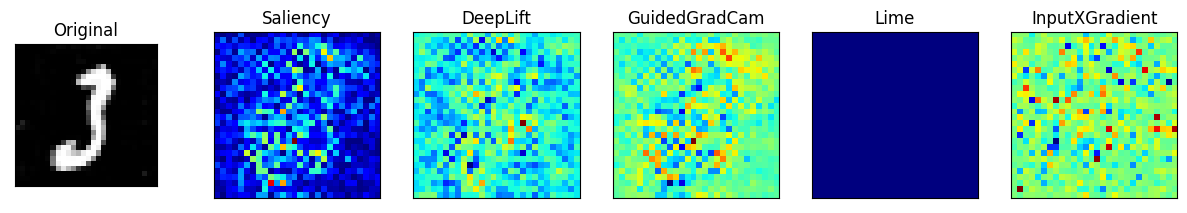

In [71]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 7, 1)
plt.imshow(fake.detach().squeeze().numpy(), cmap=plt.cm.gray)
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 6, 2)
plt.imshow(s_exp.detach().squeeze().numpy(), cmap=plt.cm.jet)
plt.title("Saliency")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 6, 3)
plt.imshow(dl_exp.detach().squeeze().numpy(), cmap=plt.cm.jet)
plt.title("DeepLift")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 6, 4)
plt.imshow(ggc_exp.cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)
plt.title("GuidedGradCam")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 6, 5)
plt.imshow(lime_exp.cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)
plt.title("Lime")
plt.xticks([])
plt.yticks([])

# plt.subplot(1, 7, 6)
# plt.imshow(dls_exp.cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)
# plt.title("DeepLiftShap")
# plt.xticks([])
# plt.yticks([])

plt.subplot(1, 6, 6)
plt.imshow(ixg_exp.cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)
plt.title("InputXGradient")
plt.xticks([])
plt.yticks([])